<a href="https://colab.research.google.com/github/VasudevKrishna1990/GenAI/blob/main/Class_2%5CHandWriting_Prj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras import layers , models
import numpy as np
import matplotlib.pyplot as plt


In [3]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
#plt.imshow(x_train[2],cmap = 'hot')

In [5]:
x_train,x_test = x_train/255.0,x_test/255.0

In [8]:
model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),#first layer / input layer
    layers.Dense(128,activation='relu'), #hidden layer - Dense all neurons are connected to each other
    layers.Dense(10,activation='softmax') # op layer , 10 for 10 no of digits.
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
history = model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9902 - loss: 0.0325
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9924 - loss: 0.0250
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9939 - loss: 0.0194
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9958 - loss: 0.0157
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9956 - loss: 0.0150


In [11]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print(f'Test Accuracy :{test_acc* 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9739 - loss: 0.0853
Test Accuracy :97.70%


In [12]:
predictions = model.predict(x_test)
print(predictions)
print('Predictions Shape -',predictions.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[9.3823466e-08 3.2262463e-08 3.9179913e-06 ... 9.9996144e-01
  1.7986528e-07 5.6701660e-06]
 [2.8707403e-09 2.4986343e-04 9.9974978e-01 ... 7.5207408e-13
  3.4875658e-08 4.1919628e-13]
 [2.2152348e-07 9.9705505e-01 4.2806883e-04 ... 7.2456576e-04
  1.7047103e-03 1.8698238e-06]
 ...
 [9.2260123e-12 1.0049113e-10 2.4117042e-11 ... 1.0027896e-05
  4.0745053e-06 1.0124295e-05]
 [7.4085904e-08 5.4296923e-10 1.2200291e-10 ... 8.0381255e-07
  3.8490945e-04 3.4629789e-11]
 [3.8033590e-10 2.8911247e-11 3.7972652e-09 ... 8.8801617e-13
  1.1674589e-10 1.7564712e-11]]
Predictions Shape - (10000, 10)


In [13]:
predictions[0]

array([9.3823466e-08, 3.2262463e-08, 3.9179913e-06, 2.8610928e-05,
       3.8076070e-12, 1.9242542e-08, 4.1778744e-13, 9.9996144e-01,
       1.7986528e-07, 5.6701660e-06], dtype=float32)

In [14]:
print(np.argmax(predictions[0]))

7


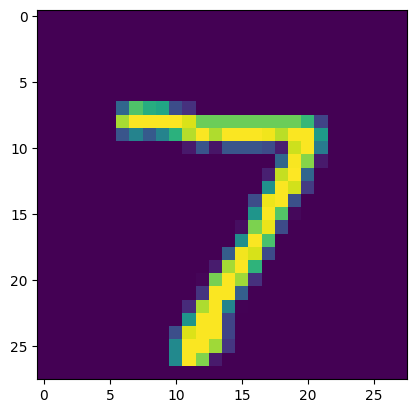

In [16]:
plt.imshow(x_test[0])

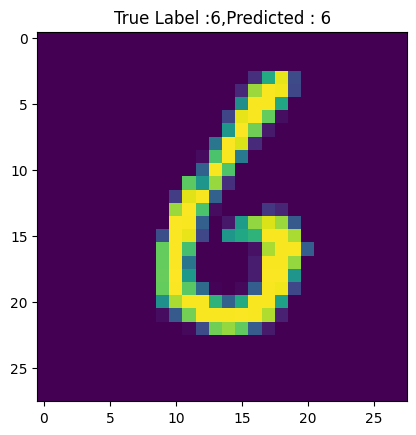

In [26]:
plt.imshow(x_test[50])
plt.title(f"True Label :{y_test[50]},Predicted : {np.argmax(predictions[50])}")
plt.show()

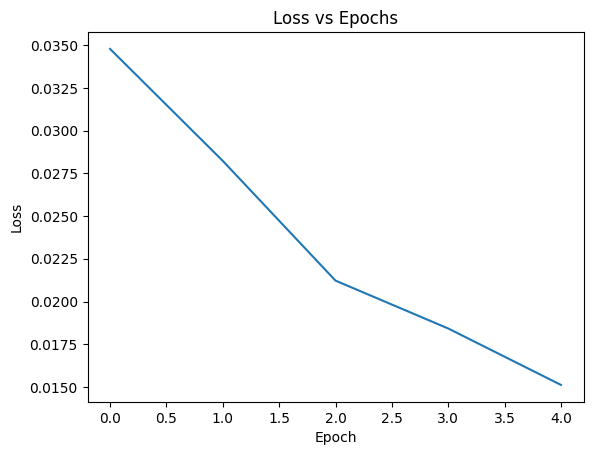

In [30]:
plt.plot(history.history['loss'],label='Training Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()